<a href="https://colab.research.google.com/github/wonseokb/Genat4_Study/blob/main/Geo_Project_PSD_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees and Random Forests

### Can we predict the quartz content of sand, at any point on Earth?

## Decision Trees

Decision trees are intuitive ways to classify or label objects: you simply ask a series of questions designed to zero in on the classification. Decision Trees are powerful algorithms, capable of fitting (and overfitting!) complex datasets. Decision Trees are also the fundamental components of Random Forests, which are among the most powerful algorithms available today.

The first part of this notebook is based on the book ["Hands-on Machine Learning with Scikit-Learn, Keras, and Tensorflow"](https://github.com/ageron/handson-ml3), by Aurélien Géron.

###1. Data

In [159]:
import numpy as np

# Load the csv data into a numpy array

#Sr90 = np.loadtxt("PSD - Sr90_50k_2.csv", delimiter=",", skiprows=1)
Sr90 = np.loadtxt("PSD - Sr90_200k.csv", delimiter=",", skiprows=1)
Cs137 = np.loadtxt("PSD - Cs137_50k_2.csv", delimiter=",", skiprows=1)
Bi207 = np.loadtxt("PSD - Bi207_50k_2.csv", delimiter=",", skiprows=1)

Sr90[:, 1:] *= 10**9
Cs137[:, 1:] *= 10**9
Bi207[:, 1:] *= 10**9

Sr90[:, 1] *= -1
Cs137[:, 1] *= -1
Bi207[:, 1] *= -1

# Print the resulting numpy array
print(Sr90.shape )

(202324, 5)


###2. Plots

Minimum value of the array: 0.0256874
Maximum value of the array: 0.405613


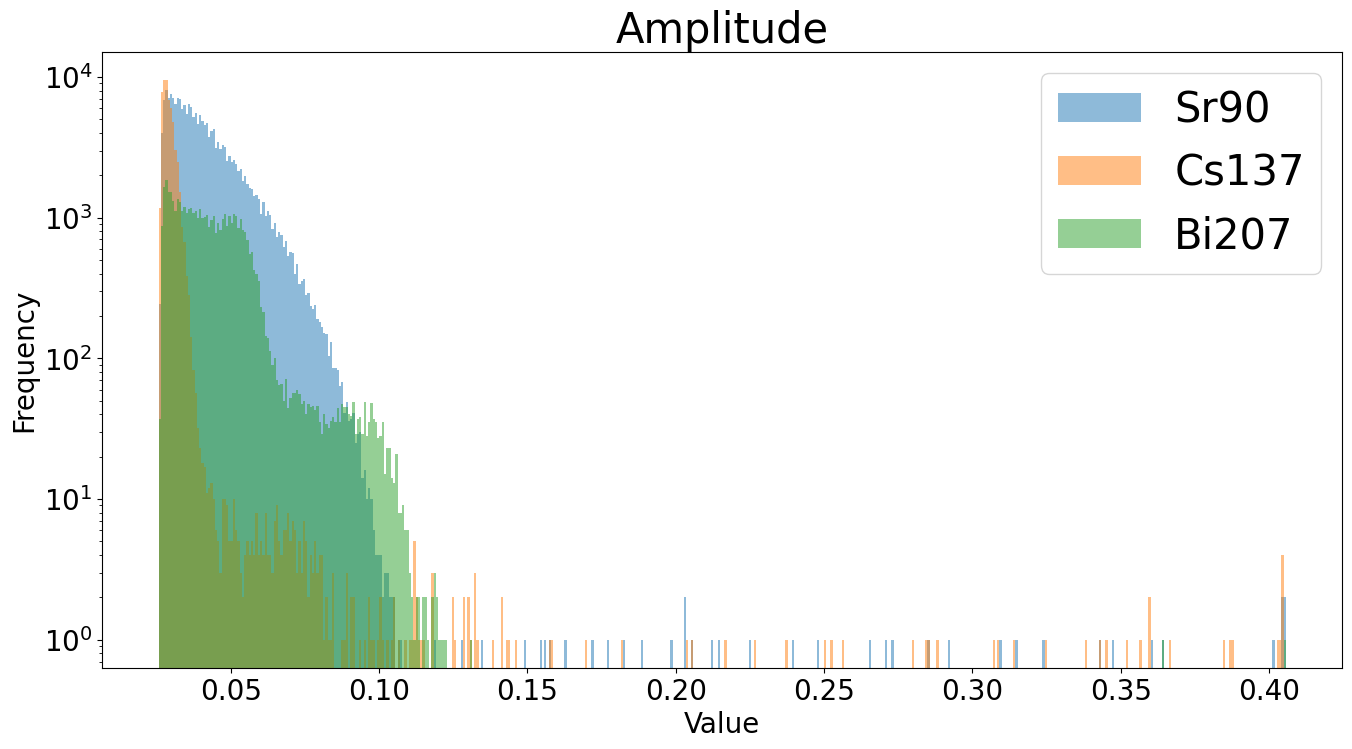

In [160]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90[:, 0])
max = np.amax(Sr90[:, 0])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)

bins = np.linspace(min, max, 501)
ax.hist(Sr90[:, 0], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137[:, 0], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207[:, 0], bins, alpha=0.5, label='Bi207')
ax.set_xlabel('Value', fontsize=20)  
ax.set_ylabel('Frequency', fontsize=20) 
ax.tick_params(axis='both', labelsize=20) 
ax.set_yscale('log')
ax.legend(fontsize=30)
ax.set_title('Amplitude', fontsize=30)
plt.show()

Minimum value of the array: 0.363603
Maximum value of the array: 8.40539


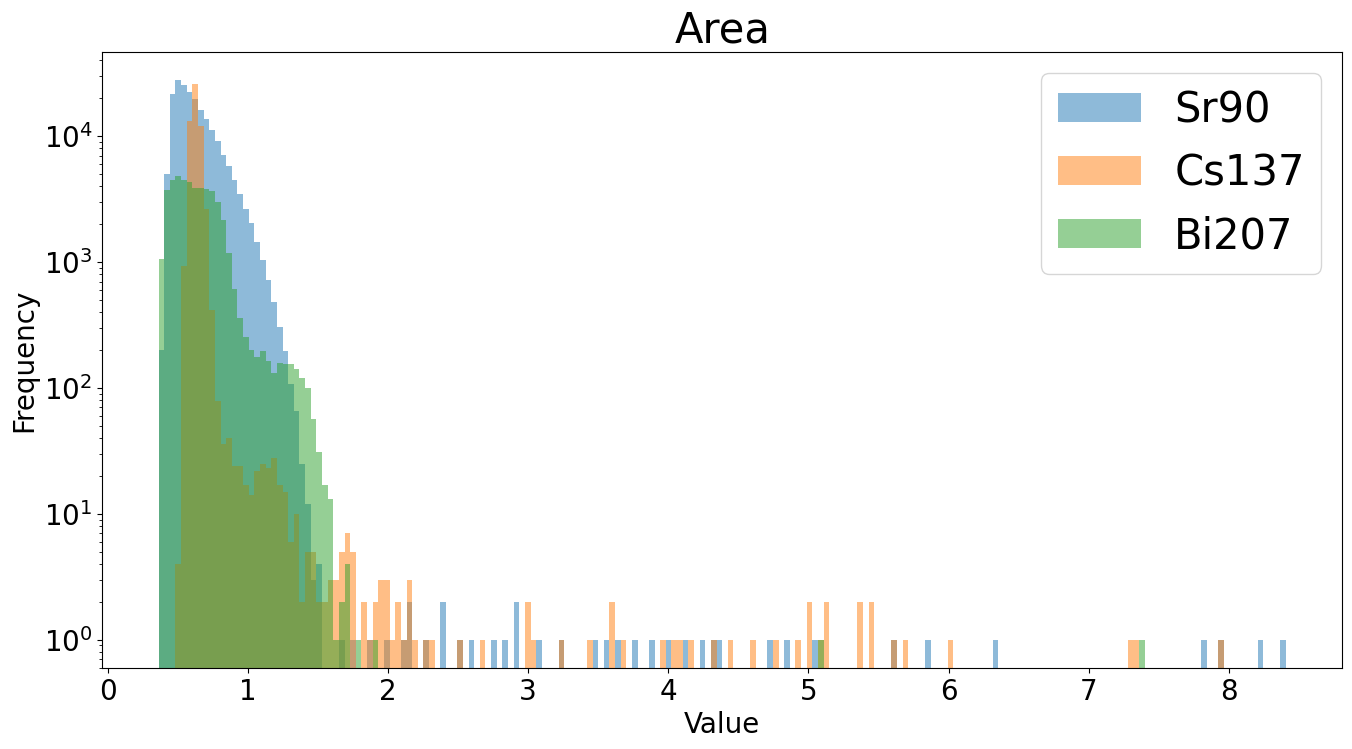

In [161]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90[:, 1])
max = np.amax(Sr90[:, 1])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 201)
ax.hist(Sr90[:, 1], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137[:, 1], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207[:, 1], bins, alpha=0.5, label='Bi207')
ax.set_xlabel('Value', fontsize=20) 
ax.set_ylabel('Frequency', fontsize=20)
ax.tick_params(axis='both', labelsize=20) 
ax.set_yscale('log') 
ax.legend(fontsize=30)
ax.set_title('Area', fontsize=30)
plt.show()

Minimum value of the array: 8.92315
Maximum value of the array: 21.5748


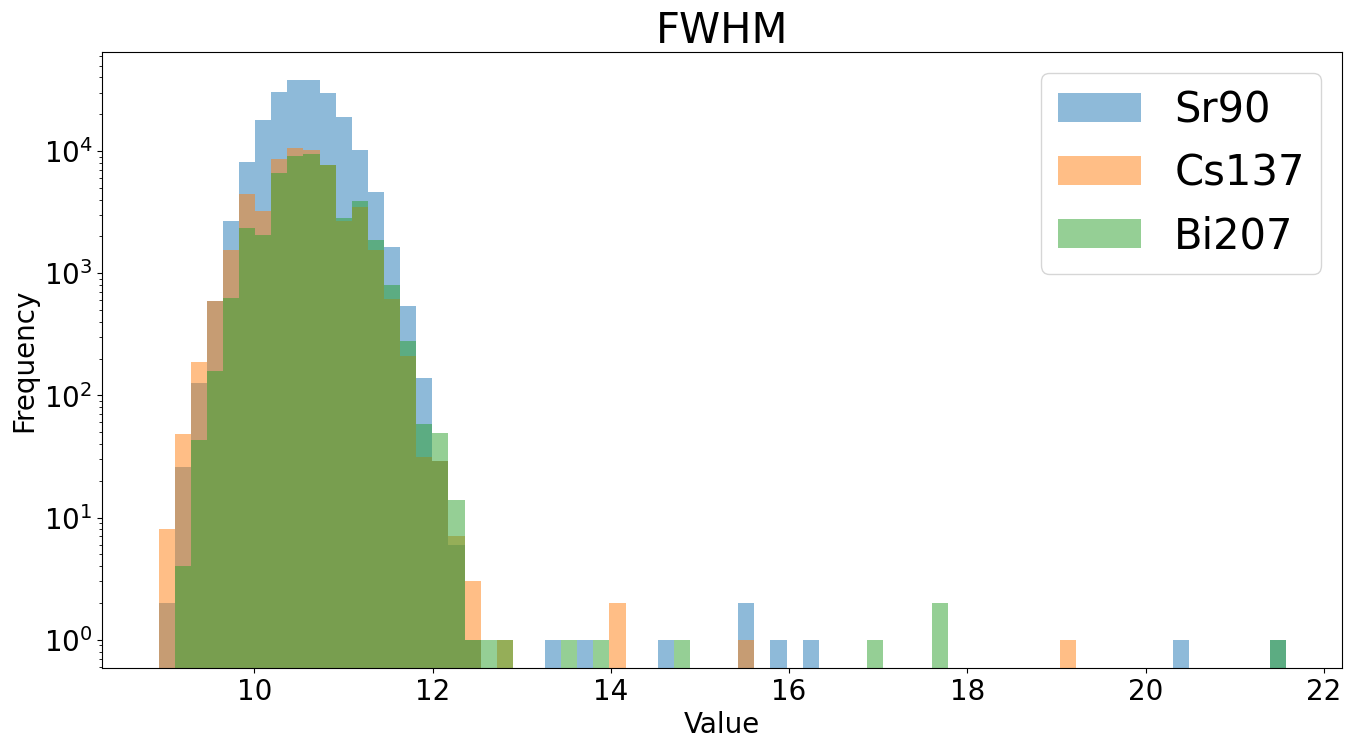

In [162]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90[:, 2])
max = np.amax(Sr90[:, 2])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 71)
ax.hist(Sr90[:, 2], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137[:, 2], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207[:, 2], bins, alpha=0.5, label='Bi207')
ax.set_xlabel('Value', fontsize=20) 
ax.set_ylabel('Frequency', fontsize=20) 
ax.tick_params(axis='both', labelsize=20) 
ax.set_yscale('log') 
ax.legend(fontsize=30)
ax.set_title('FWHM', fontsize=30)
plt.show()

Minimum value of the array: 1.54176
Maximum value of the array: 95.15050000000001


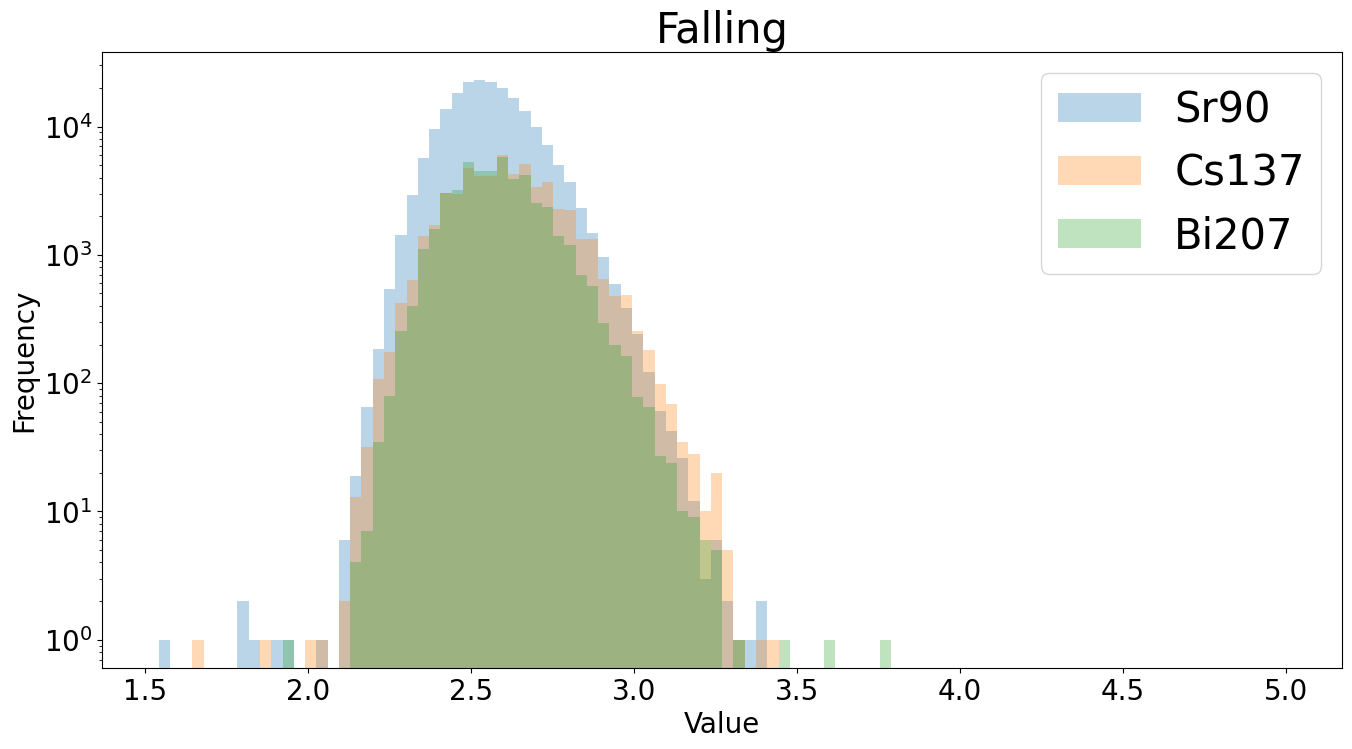

In [163]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90[:, 3])
max = np.amax(Sr90[:, 3])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, 5, 101)
ax.hist(Sr90[:, 3], bins, alpha=0.3, label='Sr90')
ax.hist(Cs137[:, 3], bins, alpha=0.3, label='Cs137')
ax.hist(Bi207[:, 3], bins, alpha=0.3, label='Bi207')
ax.set_xlabel('Value', fontsize=20) 
ax.set_ylabel('Frequency', fontsize=20)  
ax.tick_params(axis='both', labelsize=20)  
ax.set_yscale('log') 
ax.legend(fontsize=30)
ax.set_title('Falling', fontsize=30)
plt.show()

Minimum value of the array: 8.8229
Maximum value of the array: 17.997799999999998


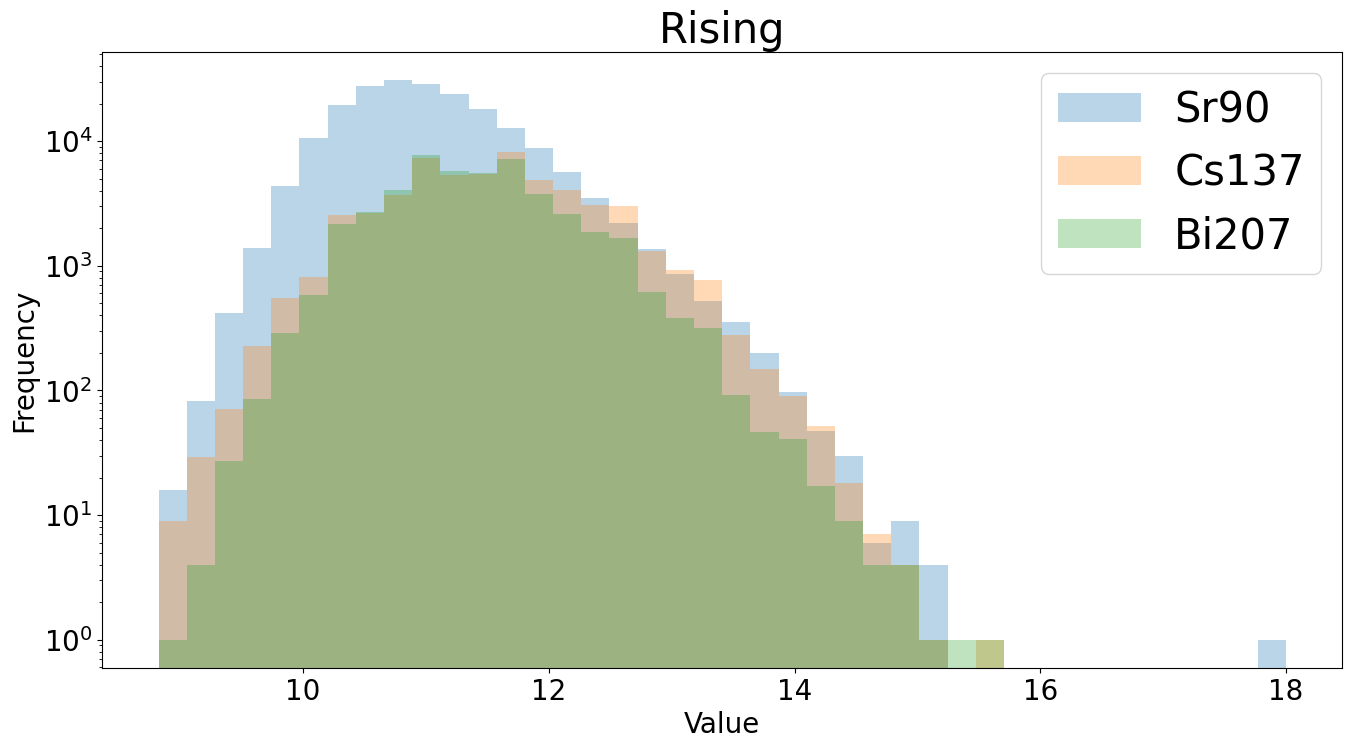

In [164]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90[:, 4])
max = np.amax(Sr90[:, 4])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 41)
ax.hist(Sr90[:, 4], bins, alpha=0.3, label='Sr90')
ax.hist(Cs137[:, 4], bins, alpha=0.3, label='Cs137')
ax.hist(Bi207[:, 4], bins, alpha=0.3, label='Bi207')
ax.set_xlabel('Value', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20) 
ax.tick_params(axis='both', labelsize=20) 
ax.set_yscale('log') 
ax.legend(fontsize=30)
ax.set_title('Rising', fontsize=30)
plt.show()

###3. Removing very small amount of(<0.1%) Outlier Data (They are Background Noise from cosmic ray)

In [195]:
Sr90_X = Sr90[:50000]
Cs137_X = Cs137
Bi207_X = Bi207

In [196]:
Sr90_X_mask = Sr90_X[:, 0] > 0.12
Sr90_X = Sr90_X[~Sr90_X_mask]
print(Sr90_X.shape)

Cs137_X_mask = Cs137_X[:, 0] > 0.10
Cs137_X = Cs137_X[~Cs137_X_mask]
print(Cs137_X.shape)

Bi207_X_mask = Bi207_X[:, 0] > 0.13
Bi207_X = Bi207_X[~Bi207_X_mask]
print(Bi207_X.shape)

(49989, 5)
(55470, 29)
(47637, 29)


In [197]:
Sr90_X_mask2 = Sr90_X[:, 1] > 2
Sr90_X = Sr90_X[~Sr90_X_mask2]
print(Sr90_X.shape)

Cs137_X_mask2 = Cs137_X[:, 1] > 3
Cs137_X = Cs137_X[~Cs137_X_mask2]
print(Cs137_X.shape)

Bi207_X_mask2 = Bi207_X[:, 1] > 2
Bi207_X = Bi207_X[~Bi207_X_mask2]
print(Bi207_X.shape)

(49989, 5)
(55470, 29)
(47637, 29)


In [198]:
Sr90_X_mask = Sr90_X[:, 2] > 13
Sr90_X = Sr90_X[~Sr90_X_mask]
print(Sr90_X.shape)

Cs137_X_mask = Cs137_X[:, 2] > 13
Cs137_X = Cs137_X[~Cs137_X_mask]
print(Cs137_X.shape)

Bi207_X_mask = Bi207_X[:, 2] > 13
Bi207_X = Bi207_X[~Bi207_X_mask]
print(Bi207_X.shape)

(49988, 5)
(55470, 29)
(47629, 29)


In [199]:
Sr90_X_mask = Sr90_X[:, 3] > 3.5
Sr90_X = Sr90_X[~Sr90_X_mask]
print(Sr90_X.shape)

Cs137_X_mask = Cs137_X[:, 3] > 3.5
Cs137_X = Cs137_X[~Cs137_X_mask]

Bi207_X_mask = Bi207_X[:, 3] > 3.5
Bi207_X = Bi207_X[~Bi207_X_mask]

print(Cs137_X.shape)
print(Bi207_X.shape)

(49986, 5)
(55467, 29)
(47610, 29)


In [200]:
Sr90_X_mask = Sr90_X[:, 3] < 1.7
Sr90_X = Sr90_X[~Sr90_X_mask]
print(Sr90_X.shape)

Cs137_X_mask = Cs137_X[:, 3] < 2.05
Cs137_X = Cs137_X[~Cs137_X_mask]

Bi207_X_mask = Bi207_X[:, 3] < 2.05
Bi207_X = Bi207_X[~Bi207_X_mask]

print(Cs137_X.shape)
print(Bi207_X.shape)

(49986, 5)
(55467, 29)
(47610, 29)


In [201]:
Sr90_X_mask = Sr90_X[:, 4] > 16
Sr90_X = Sr90_X[~Sr90_X_mask]
print(Sr90_X.shape)

Cs137_X_mask = Cs137_X[:, 4] > 16
Cs137_X = Cs137_X[~Cs137_X_mask]

# Bi207_X_mask = Bi207_X[:, 3] > 16
# Bi207_X = Bi207_X[~Bi207_X_mask]

print(Cs137_X.shape)
print(Bi207_X.shape)

(49986, 5)
(55467, 29)
(47610, 29)


###4. Plot Again

Minimum value of the array: 0.0256874
Maximum value of the array: 0.107052


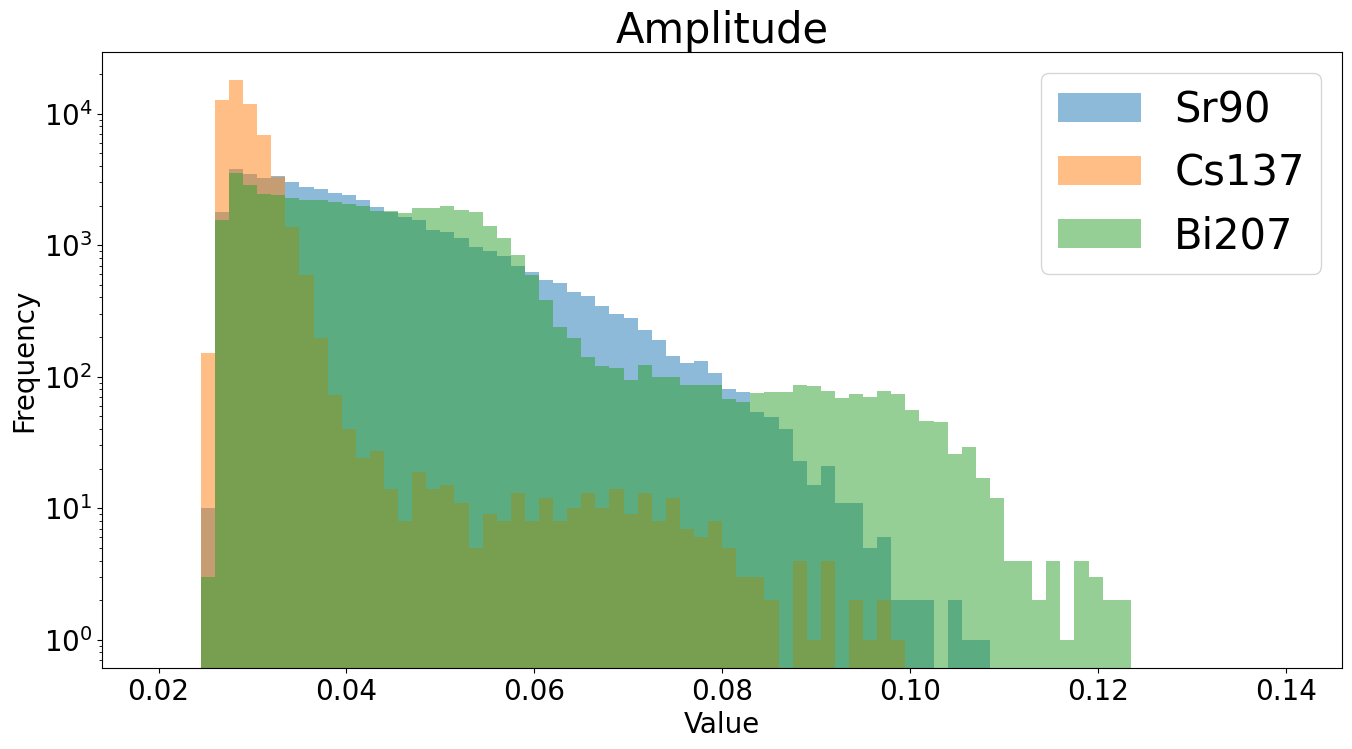

In [202]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 0])
max = np.amax(Sr90_X[:, 0])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(0.02, 0.14, 81)
ax.hist(Sr90_X[:, 0], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 0], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 0], bins, alpha=0.5, label='Bi207')
ax.set_xlabel('Value', fontsize=20) 
ax.set_ylabel('Frequency', fontsize=20)  
ax.tick_params(axis='both', labelsize=20)  
ax.set_yscale('log')  
ax.legend(fontsize=30)
ax.set_title('Amplitude', fontsize=30)
plt.show()

Minimum value of the array: 0.363603
Maximum value of the array: 1.50429


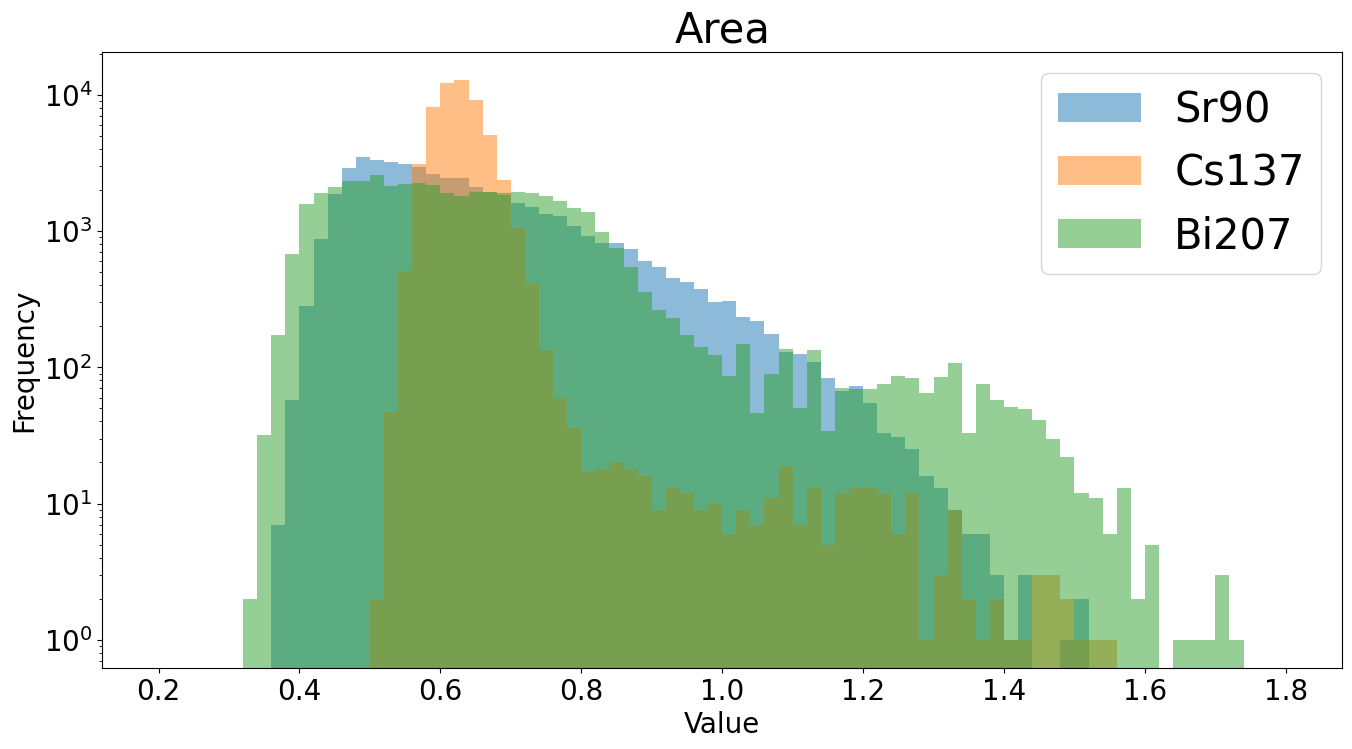

In [203]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 1])
max = np.amax(Sr90_X[:, 1])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(0.2, 1.8, 81)
ax.hist(Sr90_X[:, 1], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 1], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 1], bins, alpha=0.5, label='Bi207')
ax.set_xlabel('Value', fontsize=20) 
ax.set_ylabel('Frequency', fontsize=20)  
ax.tick_params(axis='both', labelsize=20)  
ax.set_yscale('log')  
ax.legend(fontsize=30)
ax.set_title('Area', fontsize=30)
plt.show()

Minimum value of the array: 9.16185
Maximum value of the array: 12.0875


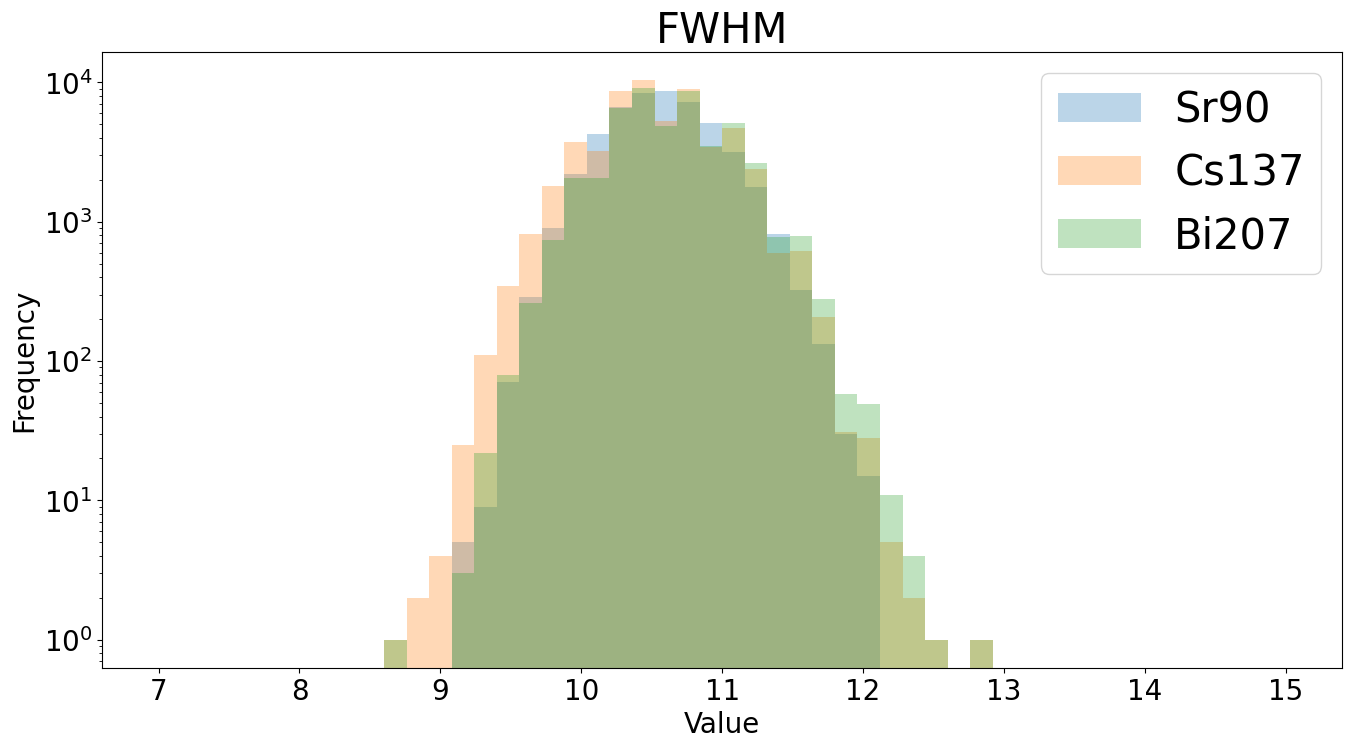

In [204]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 2])
max = np.amax(Sr90_X[:, 2])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(7, 15, 51)
ax.hist(Sr90_X[:, 2], bins, alpha=0.3, label='Sr90')
ax.hist(Cs137_X[:, 2], bins, alpha=0.3, label='Cs137')
ax.hist(Bi207_X[:, 2], bins, alpha=0.3, label='Bi207')
ax.set_xlabel('Value', fontsize=20) 
ax.set_ylabel('Frequency', fontsize=20)  
ax.tick_params(axis='both', labelsize=20) 
ax.set_yscale('log') 
ax.legend(fontsize=30)
ax.set_title('FWHM', fontsize=30)
plt.show()

Minimum value of the array: 2.1301699999999997
Maximum value of the array: 3.34253


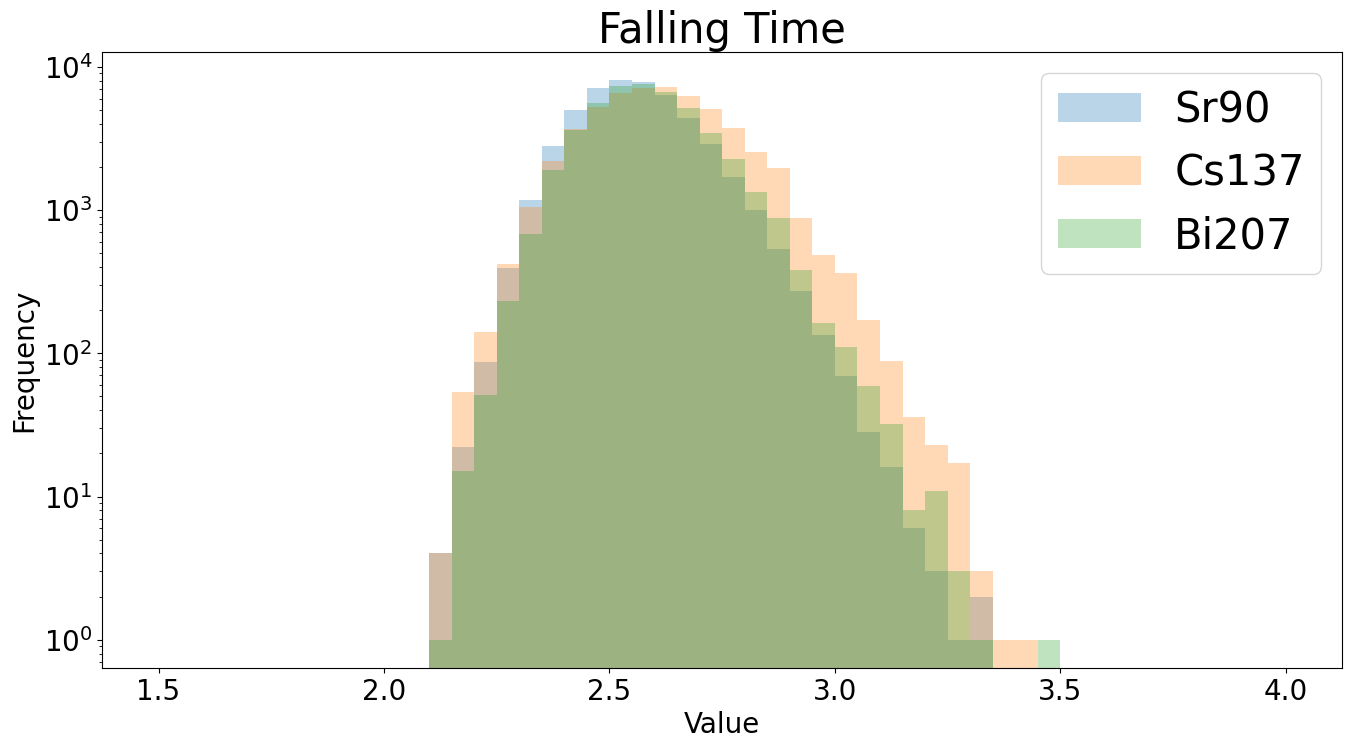

In [205]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 3])
max = np.amax(Sr90_X[:, 3])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(1.5, 4, 51)
ax.hist(Sr90_X[:, 3], bins, alpha=0.3, label='Sr90')
ax.hist(Cs137_X[:, 3], bins, alpha=0.3, label='Cs137')
ax.hist(Bi207_X[:, 3], bins, alpha=0.3, label='Bi207')
ax.set_xlabel('Value', fontsize=20) 
ax.set_ylabel('Frequency', fontsize=20) 
ax.tick_params(axis='both', labelsize=20) 
ax.set_yscale('log') 
ax.legend(fontsize=30)
ax.set_title('Falling Time', fontsize=30)
plt.show()

Minimum value of the array: 8.8229
Maximum value of the array: 15.086


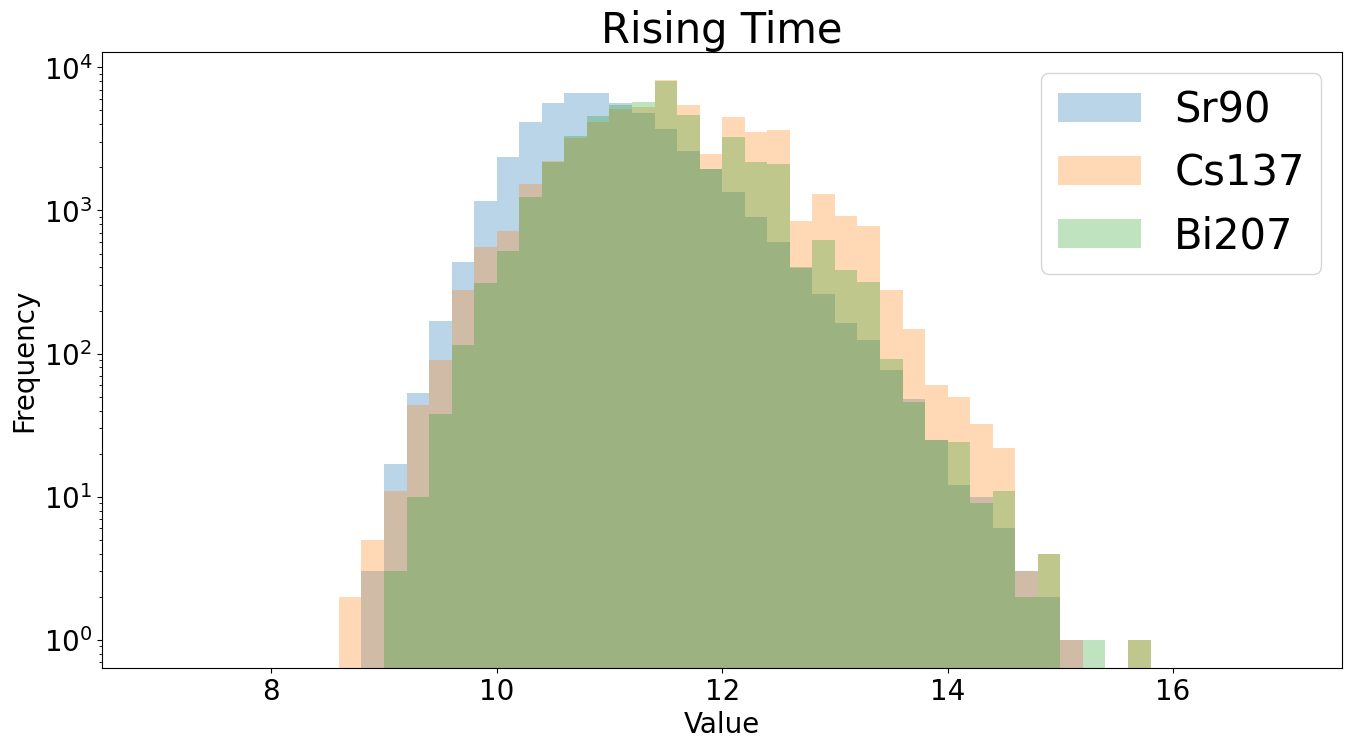

In [206]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 4])
max = np.amax(Sr90_X[:, 4])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(7, 17, 51)
ax.hist(Sr90_X[:, 4], bins, alpha=0.3, label='Sr90')
ax.hist(Cs137_X[:, 4], bins, alpha=0.3, label='Cs137')
ax.hist(Bi207_X[:, 4], bins, alpha=0.3, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Rising Time', fontsize=30)
plt.show()

###5. Collect a data to use

In [207]:
Sr90_X = Sr90[:47000]
Cs137_X = Cs137[:47000]
Bi207_X = Bi207[:47000]

Sr90_X = Sr90_X[:,:5]
Cs137_X = Cs137_X[:,:5]
Bi207_X = Bi207_X[:,:5]

In [208]:
print(Sr90_X.shape)
print(Cs137_X.shape)
print(Bi207_X.shape)

(47000, 5)
(47000, 5)
(47000, 5)


In [209]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [210]:

# Save Sr90_X to a CSV file in /content/drive/MyDrive/
np.savetxt('/content/drive/MyDrive/PSD-Project/Sr90_X_try2.csv', Sr90_X, delimiter=',')

# Save Cs137_X to a CSV file in /content/drive/MyDrive/
np.savetxt('/content/drive/MyDrive/PSD-Project/Cs137_X_try2.csv', Cs137_X, delimiter=',')

# Save Bi207_X to a CSV file in /content/drive/MyDrive/
np.savetxt('/content/drive/MyDrive/PSD-Project/Bi207_X_try2.csv', Bi207_X, delimiter=',')

In [211]:
Sr90_Y = np.full(47000, 90, dtype=np.int32)
Cs137_Y = np.full(47000, 137, dtype=np.int32)
Bi207_Y = np.full(47000, 207, dtype=np.int32)

In [212]:
print(Sr90_Y.shape)
print(Cs137_Y.shape)
print(Bi207_Y.shape)

(47000,)
(47000,)
(47000,)


In [213]:
X = np.concatenate([Sr90_X, Cs137_X, Bi207_X], axis=0)
X.shape

(141000, 5)

In [214]:
y = np.concatenate([Sr90_Y, Cs137_Y, Bi207_Y], axis=0)
y.shape

(141000,)

###6. Random Forest

In [215]:
from sklearn.model_selection import train_test_split
#from sklearn.datasets import make_moons

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [216]:
rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=64, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred3 = rnd_clf.predict(X_test)

In [217]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred3))

0.9


In [218]:
rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=5000, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred9 = rnd_clf.predict(X_test)

In [219]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred9))

0.978468085106383


###7. Result with Confusion Matrix(percentage)


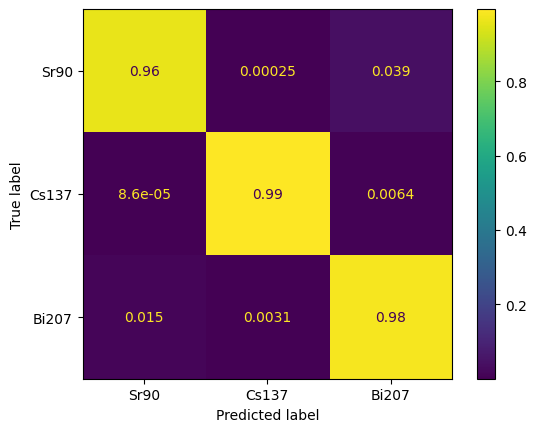

In [220]:
#Confusion Matrix with percetage

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred9)

# Normalize the confusion matrix to show the probability values
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a ConfusionMatrixDisplay object with probability values
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sr90', 'Cs137', 'Bi207'])

# Display the confusion matrix with probability values
disp.plot()

In [221]:
rnd_clf.feature_importances_

array([0.3289449 , 0.29349772, 0.13553809, 0.0418816 , 0.20013769])

In [222]:
n_features = rnd_clf.n_features_in_

In [223]:
feature_list = ['Amp', 'Area', 'FWHM', 'Falling Time', 'Rising Time']

<Figure size 8000x6000 with 0 Axes>

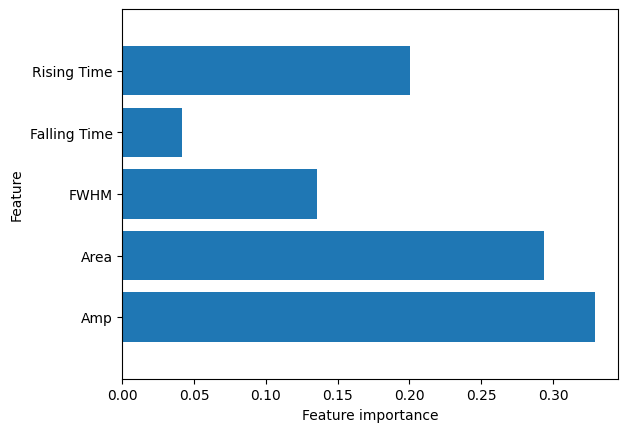

<Figure size 8000x6000 with 0 Axes>

In [224]:
import matplotlib.pyplot as plt

plt.barh(np.arange(n_features), rnd_clf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), feature_list)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features);
plt.figure(figsize=(80, 60))

###8. using only 2 features (traditional way)

In [225]:
X.shape

(141000, 5)

In [226]:
X = X[:,:2]

In [227]:
X.shape

(141000, 2)

In [228]:
from sklearn.model_selection import train_test_split
#from sklearn.datasets import make_moons

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [231]:
rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=5000, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred9 = rnd_clf.predict(X_test)

In [232]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred9))

0.9249645390070922


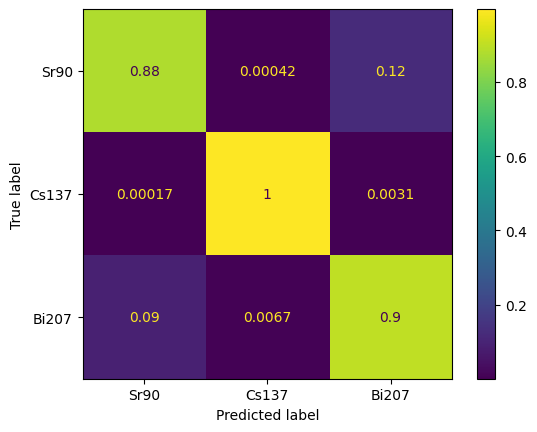

In [233]:
#Confusion Matrix with percetage

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred9)

# Normalize the confusion matrix to show the probability values
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a ConfusionMatrixDisplay object with probability values
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sr90', 'Cs137', 'Bi207'])

# Display the confusion matrix with probability values
disp.plot()

### 9. Extended Features

In [234]:
X = np.concatenate([Sr90_X, Cs137_X, Bi207_X], axis=0)
X.shape

(141000, 5)

In [240]:
import numpy as np

# calculate ratios for extended features
ratio1 = X[:, 1] / X[:, 0]  # area / amp #good
ratio2 = X[:, 2] / X[:, 0]  # FWHM / amp
ratio3 = X[:, 3] / X[:, 0]  # falling time / amp #good
ratio4 = X[:, 4] / X[:, 0]  # rising time / amp 

ratio5 = X[:, 2] / X[:, 1]  # FWHM / area #good
ratio6 = X[:, 3] / X[:, 1]  # falling / area
ratio7 = X[:, 4] / X[:, 1]  # rising / area
ratio8 = (X[:, 4] - X[:, 3]) / X[:, 1]  # (rising-falling) / area #good
ratio9 = (X[:, 4] + X[:, 3]) / X[:, 1]  # (rising+falling) / area #good

ratio10 = X[:, 3] / X[:, 2]  # falling / FWHM
ratio11 = X[:, 4] / X[:, 2]  # rising / FWHM #good
ratio12 = (X[:, 4] - X[:, 3]) / X[:, 2]  # (rising-falling) / FWHM
ratio13 = (X[:, 4] + X[:, 3]) / X[:, 2]  # (rising+falling) / FWHM

ratio14 = X[:, 4] / X[:, 3]  # rising / falling

ratio15 = X[:, 3] * X[:, 0] / X[:, 1] # falling time x amp / area #good
ratio16 = X[:, 4] * X[:, 0] /  X[:, 1] # rising time x amp / area #good
ratio17 = (X[:, 4] - X[:, 3]) * X[:, 0] / X[:, 1]  # (rising-falling) x amp / area #good
ratio18 = (X[:, 4] + X[:, 3]) * X[:, 0] / X[:, 1]  # (rising+falling) x amp / area #good

###Here we need to pick the columns to add X which would make the better accuracy than "only 5 columns - 0.978468085106383. with (n_estimators=1000, max_leaf_nodes=5000, random_state=42)

In [241]:
# add new columns to X
X = np.column_stack((X, ratio15, ratio16, ratio17, ratio18))

# verify new shape of X
print(X.shape)

(141000, 9)


In [242]:
from sklearn.model_selection import train_test_split
#from sklearn.datasets import make_moons

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [243]:
rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=64, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred3 = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred3))

0.8849645390070922


In [244]:
rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=5000, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred9 = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred9))

0.9652765957446808


In [245]:
rnd_clf.feature_importances_

array([0.04168371, 0.05126745, 0.13449655, 0.02749576, 0.09926684,
       0.15654874, 0.15202196, 0.08852342, 0.24869557])